# Noun auction price vs. auction end time (US-EASTERN)
## By [pbrianandj.eth](https://twitter.com/pbrianandj)

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np
from datetime import datetime
import pytz


import seaborn as sns; sns.set()

In [5]:
from python_graphql_client import GraphqlClient

# Instantiate the client with an endpoint.
client = GraphqlClient(endpoint="https://api.thegraph.com/subgraphs/name/nounsdao/nouns-subgraph")

In [6]:
# Create the query string and variables required for the request.
query = """
    {
  auctions(first: 1000, orderBy: id) {
    id,
    amount,
    endTime
  }
}
"""
# Synchronous request
data = client.execute(query=query)


In [8]:
price = []
endTime = []

WEI_TO_ETH_CONVERSION_FACTOR = 1000000000000000000

for auction in data['data']['auctions']:
    price.append(int(auction['amount']) / WEI_TO_ETH_CONVERSION_FACTOR)
    endTime.append(int(auction['endTime']))
    
US_EAST_TZ = pytz.timezone("US/Eastern")

endTime = list(
    map(lambda x: US_EAST_TZ.localize(datetime.fromtimestamp(x)), endTime)
)

endTimeHour = list(
    map(lambda x: x.hour, endTime)
)

Note: We remove the first auction as that is a HUGE outlier

In [9]:
df = pd.DataFrame(list(zip(endTimeHour[1:], price[1:])), columns = ['End time hour (EST)', 'Price (ETH)'])

In [10]:
avg_price_per_hour_est = df.groupby('End time hour (EST)').mean().reset_index()

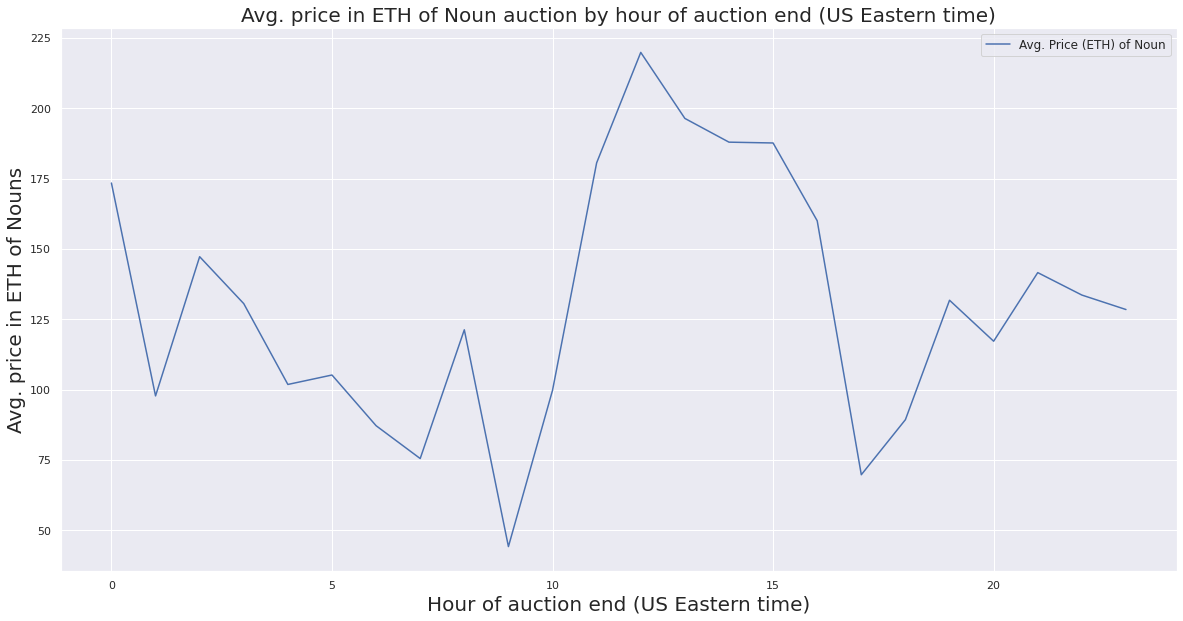

In [16]:
plt.figure(figsize=(20,10))
plt.plot(avg_price_per_hour_est['End time hour (EST)'], avg_price_per_hour_est['Price (ETH)'], label='Avg. Price (ETH) of Noun')
plt.ylabel('Avg. price in ETH of Nouns', fontsize=20)
plt.xlabel('Hour of auction end (US Eastern time)', fontsize=20)
plt.title('Avg. price in ETH of Noun auction by hour of auction end (US Eastern time)', fontsize=20)
plt.legend(fontsize=12)